In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
EPA = pd.read_csv('EPA_-_Percent_of_Residents_Earning_above_the_Asset_Limited__Income_Constrained__Employed__ALICE__Threshold_20240123.csv')
EPA.head()

,Year Start,Year End,Year,Pct earning above ALICE threshold,Race/Ethnicity
0,01/01/2017 12:00:00 AM,12/31/2017 12:00:00 AM,2017,0.68,White
1,01/01/2017 12:00:00 AM,12/31/2017 12:00:00 AM,2017,0.33,Black/AA
2,01/01/2017 12:00:00 AM,12/31/2017 12:00:00 AM,2017,0.60,Asian
3,01/01/2017 12:00:00 AM,12/31/2017 12:00:00 AM,2017,0.43,Two or More
4,01/01/2017 12:00:00 AM,12/31/2017 12:00:00 AM,2017,0.39,Hispanic


In [3]:
## Load in Employment Stats
emp_stats = pd.read_csv('Employment_Statistics_20240127.csv')
emp_stats.head()

,Name,Variable,Variable Code,Date,Value,Row ID,Geography ID,Geography Type,Location
0,"Kent County, MI",Employment,5,01/01/2013 12:00:00 AM,298364.0,LAUCN260810000000005_20130101,26081,county,POINT (-85.547446 43.032497)
1,"Kent County, MI",Employment,5,02/01/2013 12:00:00 AM,301651.0,LAUCN260810000000005_20130201,26081,county,POINT (-85.547446 43.032497)
2,"Kent County, MI",Employment,5,03/01/2013 12:00:00 AM,302103.0,LAUCN260810000000005_20130301,26081,county,POINT (-85.547446 43.032497)
3,"Kent County, MI",Employment,5,04/01/2013 12:00:00 AM,304720.0,LAUCN260810000000005_20130401,26081,county,POINT (-85.547446 43.032497)
4,"Kent County, MI",Employment,5,05/01/2013 12:00:00 AM,307792.0,LAUCN260810000000005_20130501,26081,county,POINT (-85.547446 43.032497)


In [4]:
#### Clean Employment Stats Data ####
emp_stats["Lat"] = [0.0]*len(emp_stats) ## Creating a Latitude Column
emp_stats['Long'] = [0.0]*len(emp_stats) ## Creating a Longitude Column

for i in range(len(emp_stats)):
    ###Turning the Date column in datetime objects and dropping the time
    emp_stats.loc[i,'Date'] = datetime.strptime(emp_stats.loc[i,'Date'][:10], "%m/%d/%Y").date()

    ###Turning the long and lat point into two new columns
    if emp_stats.loc[i,'Location'] == 'POINT (-85.547446 43.032497)':
        emp_stats.loc[i,'Long'] = -85.547446
        emp_stats.loc[i,'Lat'] = 43.032497
    elif emp_stats.loc[i,'Location'] == 'POINT (-85.65557 42.961156)':
        emp_stats.loc[i,'Long'] = -85.65557
        emp_stats.loc[i,'Lat'] = 42.961156
    elif emp_stats.loc[i,'Location'] == 'POINT (-85.660493 44.8441757)':
        emp_stats.loc[i,'Long'] = -85.660493
        emp_stats.loc[i,'Lat'] = 44.8441757
    elif emp_stats.loc[i,'Location'] == 'POINT (-85.65557000000001 42.961156)':
        emp_stats.loc[i,'Long'] = -85.65557
        emp_stats.loc[i,'Lat'] = 42.961156

In [5]:
### If you want to save the cleaned data uncomment the line below and run this cell
# emp_stats.to_csv(Employment_Statistics_Clean.csv)

In [6]:
gr = emp_stats[emp_stats['Name']=='Grand Rapids city, MI']

In [7]:
employment = gr[gr['Variable']=='Employment']
employment = employment.sort_values(by='Date')
labor_force = gr[gr['Variable']=='Labor Force']
labor_force = labor_force.sort_values(by='Date')
unemployment = gr[gr['Variable'] == "Unemployment"]
unemployment = unemployment.sort_values(by='Date')
unemployment_rate = gr[gr['Variable'] == 'Unemployment Rate']
unemployment_rate = unemployment_rate.sort_values(by='Date')

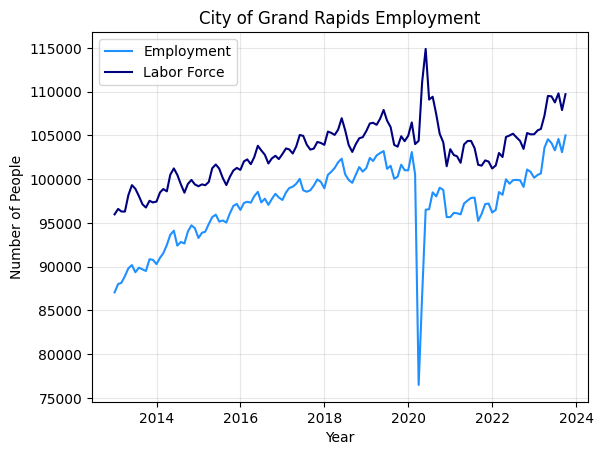

In [8]:
plt.plot(employment['Date'],employment['Value'],color='dodgerblue',label='Employment')
plt.plot(labor_force['Date'],labor_force['Value'],color='navy',label='Labor Force')
plt.ylabel("Number of People")
plt.xlabel("Year")
plt.title("City of Grand Rapids Employment")
plt.grid(alpha=.3)
plt.legend(loc='upper left')

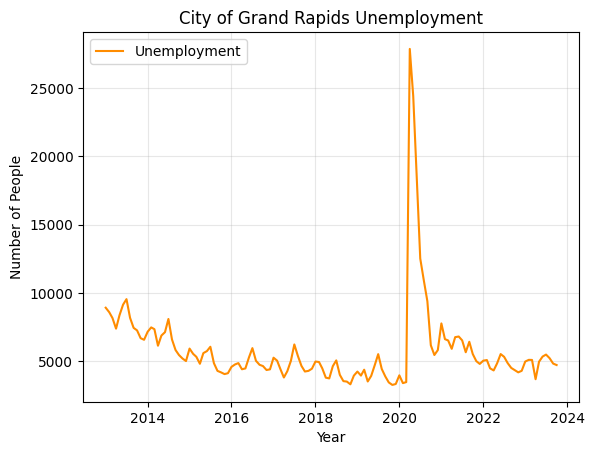

In [9]:
plt.plot(unemployment['Date'],unemployment['Value'],color='darkorange',label='Unemployment')
plt.ylabel("Number of People")
plt.xlabel("Year")
plt.title("City of Grand Rapids Unemployment")
plt.grid(alpha=.3)
plt.legend(loc='upper left')

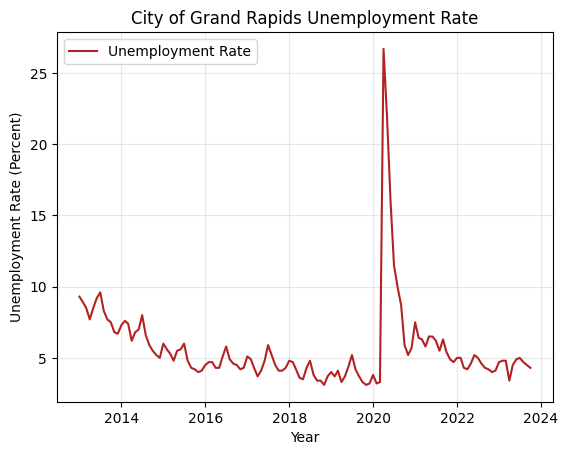

In [10]:
plt.plot(unemployment_rate['Date'],unemployment_rate['Value'],color='firebrick',label='Unemployment Rate')
plt.ylabel("Unemployment Rate (Percent)")
plt.xlabel("Year")
plt.title("City of Grand Rapids Unemployment Rate")
plt.grid(alpha=.3)
plt.legend(loc='upper left')

In [11]:
col_names_1 = ['Label (Grouping)', "Total", "Total Margin of Error", "Percent", "Percent Margin of Error", "Male", "Male Margin of Error",
             "Male Percent", "Male Percent Margin of Error", "Female", "Female Margin of Error", "Female Percent", 
             "Female Percent Margin of Error"]
col_names_2 = ['Label (Grouping)', "Total", "Total Margin of Error", "Male", "Male Margin of Error",
             "Female", "Female Margin of Error"]

In [12]:
inc_2022 = pd.read_csv('ACSST5Y2022.csv',names = col_names_1, skiprows=[0])
inc_2021 = pd.read_csv('ACSST5Y2021.csv',names = col_names_1, skiprows=[0])
inc_2020 = pd.read_csv('ACSST5Y2020.csv',names = col_names_1, skiprows=[0])
inc_2019 = pd.read_csv('ACSST5Y2019.csv',names = col_names_1, skiprows=[0])
inc_2018 = pd.read_csv('ACSST5Y2018.csv',names = col_names_1, skiprows=[0])
inc_2017 = pd.read_csv('ACSST5Y2017.csv',names = col_names_1, skiprows=[0])
inc_2016 = pd.read_csv('ACSST5Y2016.csv',names = col_names_2, skiprows=[0])
inc_2015 = pd.read_csv('ACSST5Y2015.csv',names = col_names_2, skiprows=[0])
inc_2014 = pd.read_csv('ACSST5Y2014.csv',names = col_names_2, skiprows=[0])
inc_2013 = pd.read_csv('ACSST5Y2013.csv',names = col_names_2, skiprows=[0])
inc_2012 = pd.read_csv('ACSST5Y2012.csv',names = col_names_2, skiprows=[0])
inc_2011 = pd.read_csv('ACSST5Y2011.csv',names = col_names_2, skiprows=[0])
inc_2010 = pd.read_csv('ACSST5Y2010.csv',names = col_names_2, skiprows=[0])

In [13]:
for year in range(2010, 2017):
    globals()[f"range_{year}"] = globals()[f"inc_{year}"][2:12]
    globals()[f"range_{year}"].loc[:,"Year"] = [year]*len(globals()[f"range_{year}"])

C:\Users\anies\AppData\Local\Temp\ipykernel_49412\1350272517.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[f"range_{year}"].loc[:,"Year"] = [year]*len(globals()[f"range_{year}"])
C:\Users\anies\AppData\Local\Temp\ipykernel_49412\1350272517.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[f"range_{year}"].loc[:,"Year"] = [year]*len(globals()[f"range_{year}"])
C:\Users\anies\AppData\Local\Temp\ipykernel_49412\1350272517.py:3: SettingWithCopyWarning: 
A value is trying to be set on

In [14]:
col_names = {'Percent': 'Total','Percent Margin of Error': 'Total Margin of Error',
             'Male Percent': 'Male','Male Percent Margin of Error': 'Male Margin of Error','Female Percent': 'Female',
                            	'Female Percent Margin of Error': 'Female Margin of Error'}

In [15]:
for year in range(2017, 2023):
    globals()[f"range_{year}"] = globals()[f"inc_{year}"][2:12][['Label (Grouping)','Percent','Percent Margin of Error','Male Percent',
                                                    'Male Percent Margin of Error','Female Percent','Female Percent Margin of Error']]
    globals()[f"range_{year}"].loc[:,"Year"] = [year]*len(globals()[f"range_{year}"])
    globals()[f"range_{year}"] = globals()[f"range_{year}"].rename(columns=col_names)

In [16]:
full_time_salary_ranges = pd.concat([range_2022, range_2021, range_2020, range_2019, range_2018, range_2017, range_2016, range_2015, range_2014, range_2013,
           range_2012, range_2011, range_2010],ignore_index=True)

In [17]:
full_time_salary_ranges.loc[:,'Total'] = full_time_salary_ranges.loc[:,'Total'].str.replace(',', '').str.rstrip('%').astype(float)
full_time_salary_ranges.loc[:,'Male'] = full_time_salary_ranges.loc[:,'Male'].str.replace(',', '').str.rstrip('%').astype(float)
full_time_salary_ranges.loc[:,'Female'] = full_time_salary_ranges.loc[:,'Female'].str.replace(',', '').str.rstrip('%').astype(float)

full_time_salary_ranges.loc[:,'Total Margin of Error'] = full_time_salary_ranges.loc[:,'Total Margin of Error'].str.replace('[^0-9]', '', regex=True).astype(float)/10
full_time_salary_ranges.loc[:,'Male Margin of Error'] = full_time_salary_ranges.loc[:,'Male Margin of Error'].str.replace('[^0-9]', '', regex=True).astype(float)/10
full_time_salary_ranges.loc[:,'Female Margin of Error'] = full_time_salary_ranges.loc[:,'Female Margin of Error'].str.replace('[^0-9]', '', regex=True).astype(float)/10

full_time_salary_ranges.loc[:,'Label (Grouping)'] = full_time_salary_ranges.loc[:,'Label (Grouping)'].str.lstrip()

In [18]:
full_time_salary_ranges['rank'] = [0]*len(full_time_salary_ranges)

In [19]:
for i in range(len(full_time_salary_ranges)):
    if full_time_salary_ranges.loc[i,"Label (Grouping)"] == "$1 to $9,999 or loss":
       full_time_salary_ranges.loc[i,"rank"] = 1
    elif full_time_salary_ranges.loc[i,"Label (Grouping)"] == "$10,000 to $14,999":
        full_time_salary_ranges.loc[i,"rank"] = 2
    elif full_time_salary_ranges.loc[i,"Label (Grouping)"] == "$15,000 to $24,999":
        full_time_salary_ranges.loc[i,"rank"] = 3
    elif full_time_salary_ranges.loc[i,"Label (Grouping)"] == "$25,000 to $34,999":
        full_time_salary_ranges.loc[i,"rank"] = 4
    elif full_time_salary_ranges.loc[i,"Label (Grouping)"] == "$35,000 to $49,999":
        full_time_salary_ranges.loc[i,"rank"] = 5
    elif full_time_salary_ranges.loc[i,"Label (Grouping)"] == "$50,000 to $64,999":
        full_time_salary_ranges.loc[i,"rank"] = 6
    elif full_time_salary_ranges.loc[i,"Label (Grouping)"] == "$65,000 to $74,999":
        full_time_salary_ranges.loc[i,"rank"] = 7
    elif full_time_salary_ranges.loc[i,"Label (Grouping)"] == "$75,000 to $99,999":
        full_time_salary_ranges.loc[i,"rank"] = 8
    elif full_time_salary_ranges.loc[i,"Label (Grouping)"] == "$100,000 or more":
        full_time_salary_ranges.loc[i,"rank"] = 9

In [20]:
full_time_salary_ranges.head()

,Label (Grouping),Total,Total Margin of Error,Male,Male Margin of Error,Female,Female Margin of Error,Year,rank
0,"FULL-TIME, YEAR-ROUND WORKERS WITH EARNINGS",69603.0,160.1,38535.0,118.1,31068.0,118.9,2022,0
1,"$1 to $9,999 or loss",2.0,0.6,1.7,0.6,2.3,1.1,2022,1
2,"$10,000 to $14,999",1.9,0.6,1.5,0.7,2.3,0.9,2022,2
3,"$15,000 to $24,999",8.0,1.0,8.0,1.3,7.9,1.3,2022,3
4,"$25,000 to $34,999",13.5,1.1,11.9,1.1,15.5,1.7,2022,4


In [21]:
full_time_salary_ranges.to_csv('percentage_full_time_salary_ranges_clean.csv')

In [22]:
for year in range(2010, 2017):
    globals()[f"education_{year}"] = globals()[f"inc_{year}"][15:21]
    globals()[f"education_{year}"].loc[:,"Year"] = [year]*len(globals()[f"education_{year}"])

C:\Users\anies\AppData\Local\Temp\ipykernel_49412\1060567082.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[f"education_{year}"].loc[:,"Year"] = [year]*len(globals()[f"education_{year}"])
C:\Users\anies\AppData\Local\Temp\ipykernel_49412\1060567082.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[f"education_{year}"].loc[:,"Year"] = [year]*len(globals()[f"education_{year}"])
C:\Users\anies\AppData\Local\Temp\ipykernel_49412\1060567082.py:3: SettingWithCopyWarning: 
A value is try

In [23]:
for year in range(2017, 2023):
    globals()[f"education_{year}"] = globals()[f"inc_{year}"][15:21][['Label (Grouping)','Total','Total Margin of Error','Male',
                                                    'Male Margin of Error','Female','Female Margin of Error']]
    globals()[f"education_{year}"].loc[:,"Year"] = [year]*len(globals()[f"education_{year}"])

In [24]:
median_salary_per_education = pd.concat([education_2022, education_2021, education_2020, education_2019, education_2018, education_2017,
                                        education_2016, education_2015, education_2014, education_2013,education_2012, education_2011,
                                        education_2010],ignore_index=True)

In [25]:
median_salary_per_education.loc[:,'Total'] = median_salary_per_education.loc[:,'Total'].str.replace(',', '').astype(int)
median_salary_per_education.loc[:,'Male'] = median_salary_per_education.loc[:,'Male'].str.replace(',', '').astype(int)
median_salary_per_education.loc[:,'Female'] = median_salary_per_education.loc[:,'Female'].str.replace(',', '').astype(int)

median_salary_per_education.loc[:,'Total Margin of Error'] = median_salary_per_education.loc[:,'Total Margin of Error'].str.replace('[^0-9]', '', regex=True).astype(int)
median_salary_per_education.loc[:,'Male Margin of Error'] = median_salary_per_education.loc[:,'Male Margin of Error'].str.replace('[^0-9]', '', regex=True).astype(int)
median_salary_per_education.loc[:,'Female Margin of Error'] = median_salary_per_education.loc[:,'Female Margin of Error'].str.replace('[^0-9]', '', regex=True).astype(int)

In [26]:
median_salary_per_education['Label (Grouping)'] = median_salary_per_education['Label (Grouping)'].str.strip()

In [27]:
median_salary_per_education.head()

,Label (Grouping),Total,Total Margin of Error,Male,Male Margin of Error,Female,Female Margin of Error,Year
0,Population 25 years and over with earnings,42895,1124,47268,1483,38428,1264,2022
1,Less than high school graduate,26823,3708,33058,3779,21295,3492,2022
2,High school graduate (includes equivalency),33742,2335,38888,2836,24740,4188,2022
3,Some college or associate's degree,37495,1783,43033,2508,31823,2405,2022
4,Bachelor's degree,54028,3139,61534,4341,48985,2053,2022


In [28]:
median_salary_per_education.to_csv('median_salary_per_education_clean.csv')

In [29]:
for year in range(2010, 2017):
    globals()[f"median_{year}"] = globals()[f"inc_{year}"][0:2]
    globals()[f"median_{year}"].loc[:,"Year"] = [year]*len(globals()[f"median_{year}"])

C:\Users\anies\AppData\Local\Temp\ipykernel_49412\3038486836.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[f"median_{year}"].loc[:,"Year"] = [year]*len(globals()[f"median_{year}"])
C:\Users\anies\AppData\Local\Temp\ipykernel_49412\3038486836.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[f"median_{year}"].loc[:,"Year"] = [year]*len(globals()[f"median_{year}"])
C:\Users\anies\AppData\Local\Temp\ipykernel_49412\3038486836.py:3: SettingWithCopyWarning: 
A value is trying to be se

In [30]:
for year in range(2017, 2023):
    globals()[f"median_{year}"] = globals()[f"inc_{year}"][0:2][['Label (Grouping)','Total','Total Margin of Error','Male',
                                                    'Male Margin of Error','Female','Female Margin of Error']]
    globals()[f"median_{year}"].loc[:,"Year"] = [year]*len(globals()[f"median_{year}"])

In [31]:
median_salary = pd.concat([median_2022, median_2021, median_2020, median_2019, median_2018, median_2017,median_2016, median_2015, 
                           median_2014, median_2013,median_2012, median_2011,median_2010],ignore_index=True)

In [32]:
median_salary.loc[:,'Total'] = median_salary.loc[:,'Total'].str.replace(',', '').astype(int)
median_salary.loc[:,'Male'] = median_salary.loc[:,'Male'].str.replace(',', '').astype(int)
median_salary.loc[:,'Female'] = median_salary.loc[:,'Female'].str.replace(',', '').astype(int)

median_salary.loc[:,'Total Margin of Error'] = median_salary.loc[:,'Total Margin of Error'].str.replace('[^0-9]', '', regex=True).astype(int)
median_salary.loc[:,'Male Margin of Error'] = median_salary.loc[:,'Male Margin of Error'].str.replace('[^0-9]', '', regex=True).astype(int)
median_salary.loc[:,'Female Margin of Error'] = median_salary.loc[:,'Female Margin of Error'].str.replace('[^0-9]', '', regex=True).astype(int)

median_salary['Label (Grouping)'] = median_salary['Label (Grouping)'].str.strip()

In [33]:
median_salary.head()

,Label (Grouping),Total,Total Margin of Error,Male,Male Margin of Error,Female,Female Margin of Error,Year
0,Population 16 years and over with earnings,116002,1921,59669,1321,56333,1334,2022
1,Median earnings (dollars),35865,797,40405,1133,31363,1440,2022
2,Population 16 years and over with earnings,115173,1612,59670,1413,55503,1192,2021
3,Median earnings (dollars),31846,792,35421,1122,27511,1043,2021
4,Population 16 years and over with earnings,115411,1619,59950,1218,55461,1299,2020


In [34]:
median_salary.to_csv('median_salary_clean.csv')